# Predicting Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [445]:
# Data imports
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.rcParams['figure.figsize'] = [8, 4]


# ML Imports
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, ParameterSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
hotels = pd.read_csv("data/hotel_bookings.csv")
hotels

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2.0,NaN,Meal Plan 1,0.0,NaN,85.0,2018.0,8.0,3.0,Online,NaN,0.0,0.0,167.80,1.0,Not_Canceled
36271,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,INN36274,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


## The Challenge

* Use your skills to produce recommendations for the hotel on what factors affect whether customers cancel their booking.

### Note:

To ensure the best user experience, we currently discourage using Folium and Bokeh in Workspace notebooks.

## Judging Criteria

| CATEGORY | WEIGHTING | DETAILS                                                            |
|---------|----------|---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul>|
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul>|
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## Checklist before publishing


* Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
* Remove redundant cells like the judging criteria, so the workbook is focused on your work.
* Check that all the cells run without error.

## Time is ticking. Good luck! 

# Data Cleaning and Preparation

In [446]:
hotels.isnull().sum()

Booking_ID                                 0
no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                           586
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64

In [447]:
hotels.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,35862.000000,35951.000000,35908.000000,35468.00000,33683.000000,35803.000000,35897.000000,35771.000000,35294.000000,35689.000000,35778.000000,35725.000000,35815.000000,35486.000000
mean,1.845017,0.105366,0.810209,2.20331,0.030698,85.276569,2017.820431,7.424031,15.605712,0.025666,0.023646,0.154458,103.418207,0.619343
std,0.518652,0.402871,0.870857,1.40989,0.172501,85.998845,0.383834,3.068277,8.743484,0.158140,0.370835,1.764805,35.057342,0.785849
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.00000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.00000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.00000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.00000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [448]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [449]:
hotels.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [450]:
numerical_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status']
cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

In [451]:
# Convert booking_status to binary values (0 or 1)
hotels['booking_status'] = hotels['booking_status'].apply(lambda x: 0 if x == 'Canceled' else 1)

In [452]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [453]:
corr_matrix = hotels[numerical_cols].corr()

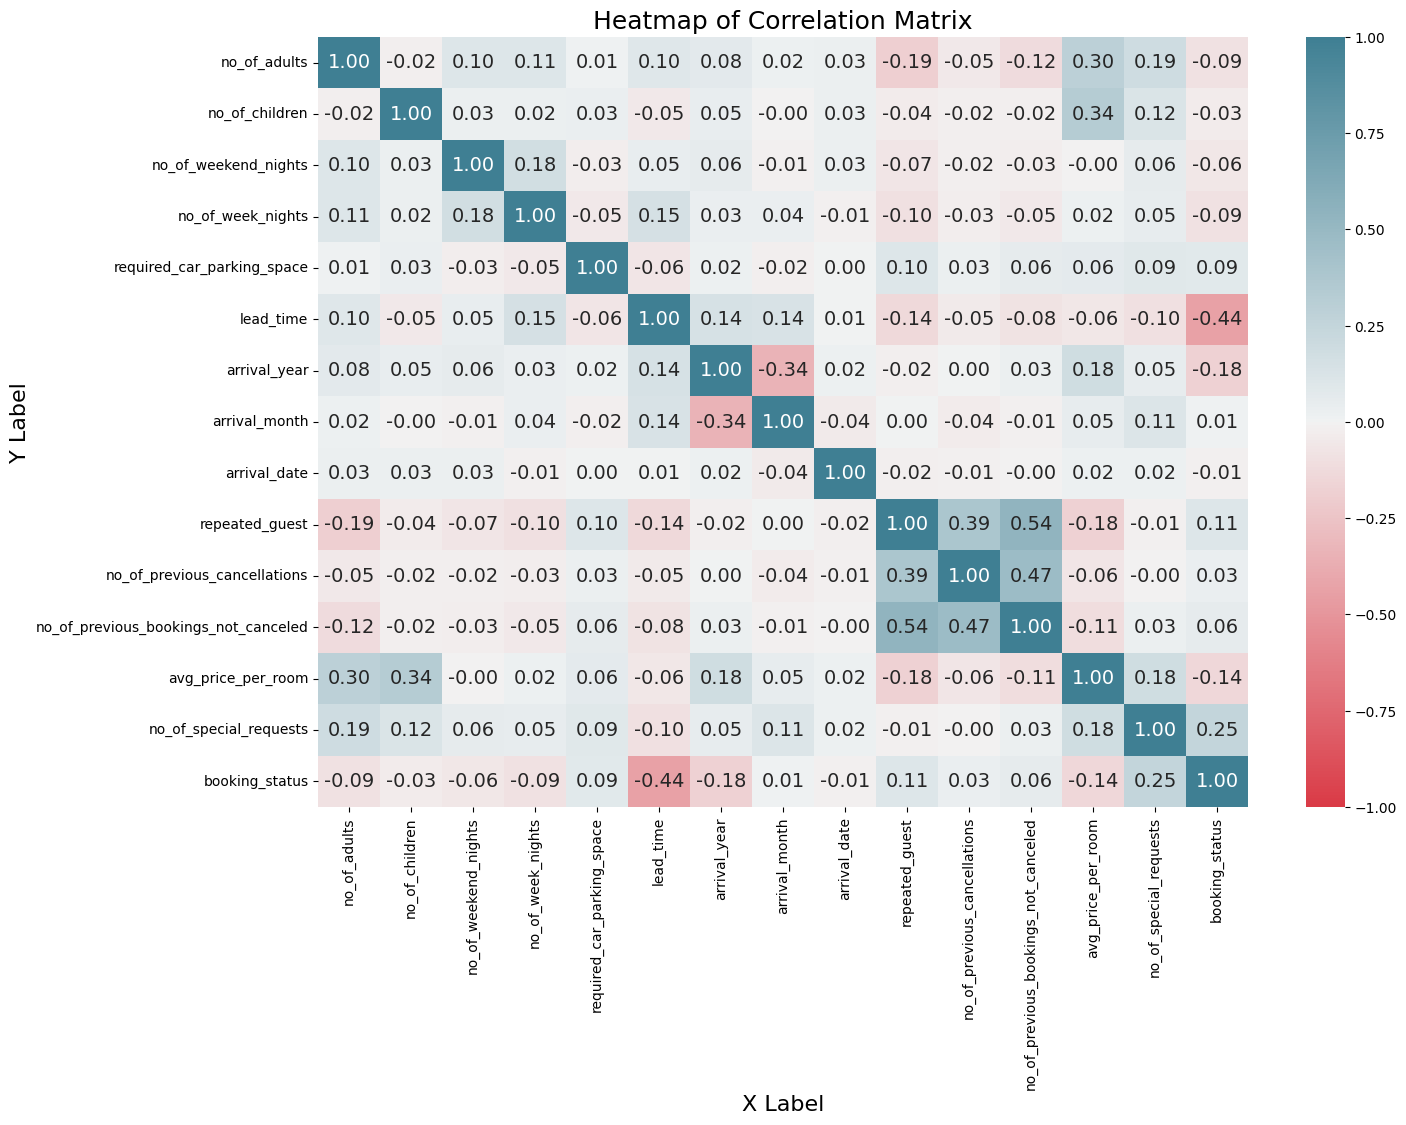

In [454]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Define the color map and color range
cmap = sns.diverging_palette(10, 220, as_cmap=True)
vmin = -1
vmax = 1

# Draw the heatmap
sns.heatmap(corr_matrix, cmap=cmap, vmin=vmin, vmax=vmax, annot=True, fmt='.2f', annot_kws={"size": 14})

# Set the axis labels and title
ax.set_xlabel('X Label', fontsize=16)
ax.set_ylabel('Y Label', fontsize=16)
ax.set_title('Heatmap of Correlation Matrix', fontsize=18)

# Show the plot
plt.show()

In [455]:
# Select the correlation values for the "booking" status column
booking_corr = corr_matrix['booking_status']

# Print the correlation values sorted in descending order
print(booking_corr.sort_values(ascending=False))

booking_status                          1.000000
no_of_special_requests                  0.253163
repeated_guest                          0.107309
required_car_parking_space              0.085165
no_of_previous_bookings_not_canceled    0.060242
no_of_previous_cancellations            0.033918
arrival_month                           0.012192
arrival_date                           -0.009397
no_of_children                         -0.033836
no_of_weekend_nights                   -0.062122
no_of_adults                           -0.087213
no_of_week_nights                      -0.093411
avg_price_per_room                     -0.142846
arrival_year                           -0.179554
lead_time                              -0.438733
Name: booking_status, dtype: float64


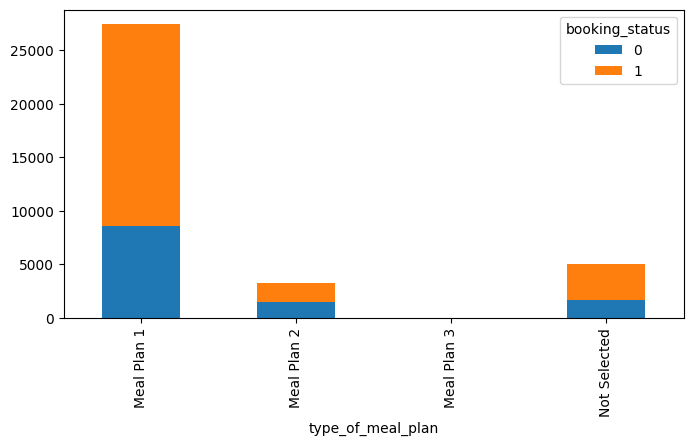

In [456]:
# Create a stacked bar chart for type_of_meal_plan
meal_plan_counts = hotels.groupby(['type_of_meal_plan', 'booking_status']).size().unstack()
meal_plan_counts.plot(kind='bar', stacked=True)
plt.show()

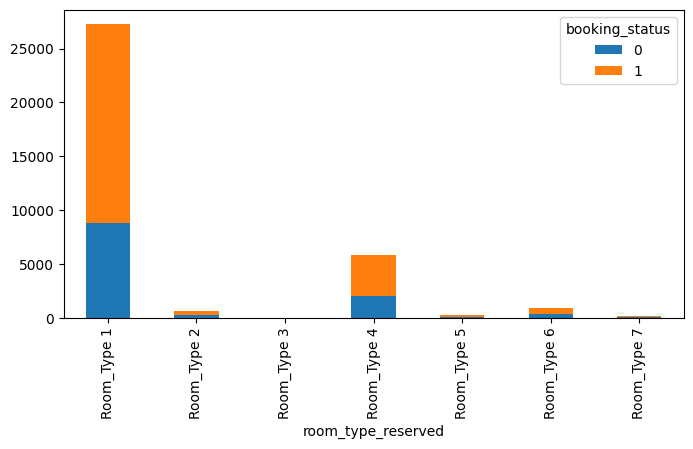

In [457]:
# Create a stacked bar chart for type_of_meal_plan
meal_plan_counts = hotels.groupby(['room_type_reserved', 'booking_status']).size().unstack()
meal_plan_counts.plot(kind='bar', stacked=True)
plt.show()

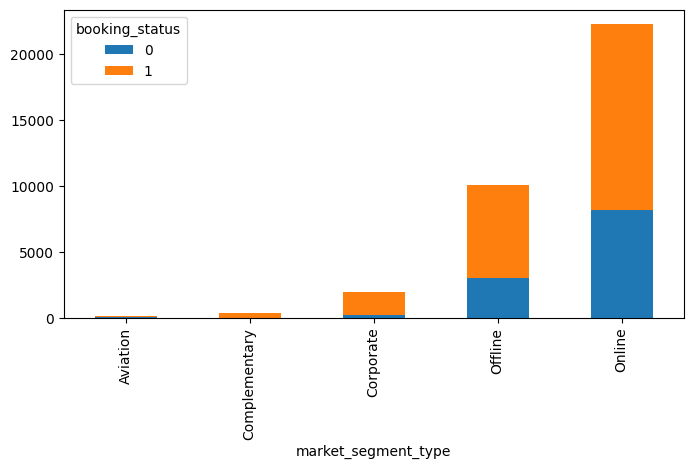

In [458]:
# Create a stacked bar chart for type_of_meal_plan
meal_plan_counts = hotels.groupby(['market_segment_type', 'booking_status']).size().unstack()
meal_plan_counts.plot(kind='bar', stacked=True)
plt.show()

# Model selection

First I will start by splitting the data into a train and test set. This is done to reduce overfitting of the model.

In [459]:
split = KFold(n_splits=4, shuffle=True, random_state=5431)

For this particular problem I have decided to try 3 different types of models. I will be implementing Logistic Regression, Decision Tree and Random Forest models. All three models are simple, but very effective for binary classification which is perfect for us.

In [460]:
models = [
    ("Logistic Regression", LogisticRegression(random_state=5431)),
    ("Decision Tree", DecisionTreeClassifier(random_state=5431)),
    ("Random Forest", RandomForestClassifier(random_state=5431, n_jobs=-1))
]

# Data Preprocessing
To clean and preprocess the data I am going to create a a pipeline to handle this. For this particular pipeline, for the nmu

In [461]:
features_num = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']
features_cat = cat_cols

In [462]:
# create transformers to impute missing values
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                         ('onehot', OneHotEncoder())])

In [463]:
# create column transformer
preprocessor = ColumnTransformer( 
    transformers=[
        ('num', numerical_transformer, features_num),
        ('cat', categorical_transformer, features_cat)
    ])

# Fitting Models
Now we will fit all of our models on the training data and then evaluate their performance

In [464]:
features = features_num + features_cat
X = hotels[features]
y = hotels['booking_status']

In [465]:
# Define a list of metrics to use
metrics = {
    'accuracy': 'accuracy',
    'f1_score': make_scorer(f1_score, average='macro')
}

# Evaluate the model for each metric
for name, model in models:
    for metric_name, metric_scoring in metrics.items():
        steps = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        # Compute cross validation score for each metric
        cv_results = cross_val_score(steps, X, y, cv=split, scoring=metric_scoring, n_jobs=-1)

        # Output results
        min_score = round(np.min(cv_results), 4)
        max_score = round(np.max(cv_results), 4)
        mean_score = round(np.mean(cv_results), 4)
        std_dev = round(np.std(cv_results), 4)
        print(f"[{name}] Cross Validation {metric_name.capitalize()} Score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

[Logistic Regression] Cross Validation Accuracy Score: 0.7942 +/- 0.0025 (std) min: 0.7914, max: 0.7974
[Logistic Regression] Cross Validation F1_score Score: 0.7531 +/- 0.0035 (std) min: 0.7485, max: 0.7567
[Decision Tree] Cross Validation Accuracy Score: 0.8542 +/- 0.0031 (std) min: 0.8509, max: 0.8593
[Decision Tree] Cross Validation F1_score Score: 0.8353 +/- 0.0044 (std) min: 0.8304, max: 0.8418
[Random Forest] Cross Validation Accuracy Score: 0.8921 +/- 0.001 (std) min: 0.8911, max: 0.8936
[Random Forest] Cross Validation F1_score Score: 0.8744 +/- 0.0018 (std) min: 0.8725, max: 0.8763


Looking at the output, the Random Forest Classifier model performed the best, with the highest accuracy score and the highest f1 score(0.8921 and 0.8744). Thus oure Random Forest Classifier model was able to correctly classify 89.21% of the hotel bookings. The F-Score of 0.8744 indicates that our model has a good balance of precision and recall, and the standard deviation is small indicating that the model performed consistently across all folds.

# Hyperparameter Tuning

In [466]:
# define the hyperparameter grid to search over
param_grid = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.1, 1, 10]
}

# create the pipeline with the preprocessor and logistic regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=5431))
])

# create the grid search object with the pipeline and hyperparameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=split, scoring='accuracy', n_jobs=-1)

# fit the grid search object on the data to find the best hyperparameters
grid_search.fit(X, y)

# print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'model__C': 0.1, 'model__penalty': 'l2'}
Best Score:  0.7960026437755573


In [467]:
# define the hyperparameter grid to search over
param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# create the pipeline with the preprocessor and decision tree model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=5431))
])

# create the grid search object with the pipeline and hyperparameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=split, scoring='accuracy', n_jobs=-1)

# fit the grid search object on the data to find the best hyperparameters
grid_search.fit(X, y)

# print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best Score:  0.8610061217428135


Tuning hyperparameters for both Logistic Regression and our Decision tree models did not really provide a large increase to the models accuracy. Next I am going to use sci-kit learn's StandardScaler library to scale my features to possibly increase the model's accuracy.

In [468]:
# define the scaler object
scaler = MinMaxScaler()

X_processed = preprocessor.fit_transform(X)

# fit the scaler object to the data and transform the data
X_scaled = scaler.fit_transform(X_processed)

In [469]:
# Define a list of metrics to use
metrics = {
    'accuracy': 'accuracy',
    'f1_score': make_scorer(f1_score, average='macro')
}

# Evaluate the model for each metric
for name, model in models:
    for metric_name, metric_scoring in metrics.items():
        steps = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('scaler', StandardScaler()),
            ('model', model)
        ])

        # Compute cross validation score for each metric
        cv_results = cross_val_score(steps, X, y, cv=split, scoring=metric_scoring, n_jobs=-1)

        # Output results
        min_score = round(np.min(cv_results), 4)
        max_score = round(np.max(cv_results), 4)
        mean_score = round(np.mean(cv_results), 4)
        std_dev = round(np.std(cv_results), 4)
        print(f"[{name}] Cross Validation {metric_name.capitalize()} Score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

[Logistic Regression] Cross Validation Accuracy Score: 0.7999 +/- 0.0022 (std) min: 0.7967, max: 0.8028
[Logistic Regression] Cross Validation F1_score Score: 0.7628 +/- 0.0017 (std) min: 0.7601, max: 0.7648
[Decision Tree] Cross Validation Accuracy Score: 0.8542 +/- 0.003 (std) min: 0.8511, max: 0.8592
[Decision Tree] Cross Validation F1_score Score: 0.8353 +/- 0.0042 (std) min: 0.8306, max: 0.8416
[Random Forest] Cross Validation Accuracy Score: 0.8919 +/- 0.0014 (std) min: 0.8903, max: 0.8935
[Random Forest] Cross Validation F1_score Score: 0.8741 +/- 0.0024 (std) min: 0.8716, max: 0.8768


After normalizing our data using the StandardScaler method from sci-kit learn I was able to slightly increase the overall accuray of the Random Forest model to 0.8919

# Conclusion
Overall I am please with the accuracy of the models. For this particular problem it is clear that using the Random Forest Classifier to predict hotel cancellations is the best approach as it was able to accurately predict the 'booking_status' 89.19% of the time, and had small standard deviation and a high f1 score of 0.8741 indicating that it has a good balance of precision and recall.